           Entre com os dados da 1a simulação           
--------------------------------------------------------
Insira o valor da massa em kg:0.5
Insira o valor da constante de amortecimento em kg/s:0.3
Insira o valor da constante elástica em N/m:3.75
Insira o valor da intensidade da força externa em N:10
Insira o valor da fase inicial em rad:0.4
--------------------------------------------------------
Insira a posição inicial em m:1
--------------------------------------------------------
Insira o valor da frequência angular externa em rad/s:0.5


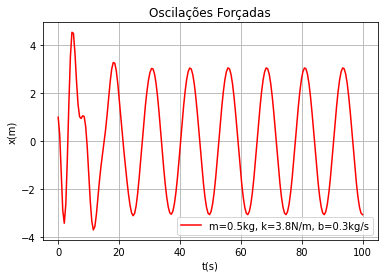

--------------------------------------------------------
entre com o valor da amplitude:3
--------------------------------------------------------
Insira o valor da frequência angular externa em rad/s:1


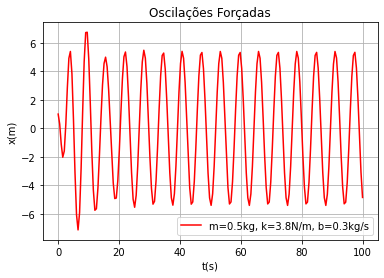

--------------------------------------------------------
entre com o valor da amplitude:5.2
--------------------------------------------------------
Insira o valor da frequência angular externa em rad/s:2


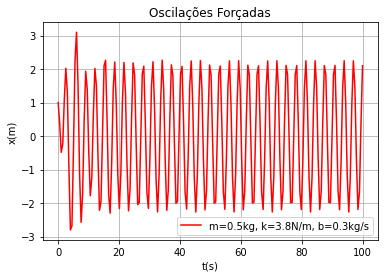

--------------------------------------------------------
entre com o valor da amplitude:2.2
--------------------------------------------------------
Insira o valor da frequência angular externa em rad/s:3


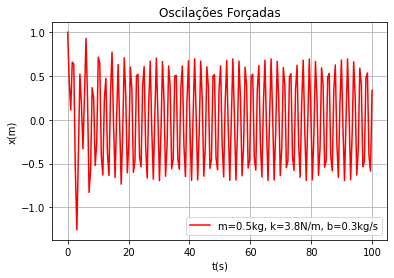

--------------------------------------------------------
entre com o valor da amplitude:0.7
--------------------------------------------------------
Execute a próxima célula


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def dx_dt(x, t):
    return [m1*x[1], -b1*x[1] - k1*x[0] - Fo*np.cos(w1*t+fi1)]

freq = []
ampl = []

print('           Entre com os dados da 1a simulação           ')
print('--------------------------------------------------------')
m1=float(input("Insira o valor da massa em kg:"))
b1=float(input("Insira o valor da constante de amortecimento em kg/s:"))
k1=float(input("Insira o valor da constante elástica em N/m:"))
Fo=float(input("Insira o valor da intensidade da força externa em N:"))
fi1=float(input("Insira o valor da fase inicial em rad:"))
print('--------------------------------------------------------')
pos=float(input("Insira a posição inicial em m:"))
x0 = [pos, 0]

w0=(k1/m1)**0.5
print('--------------------------------------------------------')
while True:
  w1=float(input("Insira o valor da frequência angular externa em rad/s:"))
  ts = np.linspace(0, 100, 200)
  xs = odeint(dx_dt, x0, ts)
  ys = xs[:,0]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  major_ticks_y = np.arange(-50, 50, 2)
  minor_ticks_y = np.arange(-50, 50, 0.5)

  #Aqui você pode alterar o nome do eixo horizontal do gráfico
  plt.xlabel("t(s)")

  #Aqui você pode alterar o nome do eixo vertical do gráfico
  plt.ylabel("x(m)")

  #Aqui você pode alterar o título do gráfico
  plt.title("Oscilações Forçadas")

  #Aqui você pode desativar o grid do gráfico digitando False no lugar de True
  plt.grid(True)

  plt.plot(ts,ys,color='red',linewidth=1.5,label='m=%.1fkg, k=%.1fN/m, b=%.1fkg/s' %(m1,k1,b1));
  plt.legend(loc=4)
  plt.show()
  print('--------------------------------------------------------')
  xmax=float(input("entre com o valor da amplitude:"))
  freq.append(w1/w0)
  ampl.append(xmax)
  print('--------------------------------------------------------')
  if w1==3:
    break
print('Execute a próxima célula')

frequência = [0.18257418583505536, 0.3651483716701107, 0.7302967433402214, 1.0954451150103321]
amplitude = [3.0, 5.2, 2.2, 0.7]


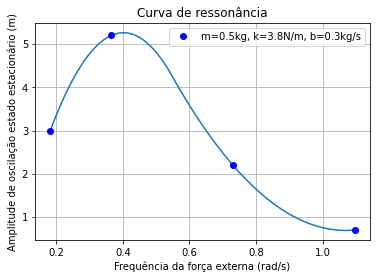

In [ ]:
plt.xlabel("Frequência da força externa (rad/s)")

plt.ylabel("Amplitude de oscilação estado estacionário (m)")

plt.title("Curva de ressonância")

plt.grid(True)

#plota uma curva média junto com os dados
xnew = np.linspace(min(freq), max(freq), 100)
smot = make_interp_spline(freq, ampl, k=2) # k = ordem do smooth
ynew = smot(xnew)
plt.plot(xnew, ynew)
###

plt.plot(freq,ampl,'bo',label='m=%.1fkg, k=%.1fN/m, b=%.1fkg/s' %(m1,k1,b1))

plt.legend(loc=0)
plt.show

print ("frequência =", freq)
print ("amplitude =", ampl)